1. Carga de datos


=== DETECCIÓN DE OUTLIERS ===

Outliers en symboling: 0

Outliers en normalized-losses: 8

Outliers en wheel-base: 3

Outliers en length: 1

Outliers en width: 8

Outliers en height: 0

Outliers en curb-weight: 0

Outliers en engine-size: 10

Outliers en bore: 0

Outliers en stroke: 20

Outliers en compression-ratio: 28

Outliers en horsepower: 6

Outliers en peak-rpm: 2

Outliers en city-mpg: 2

Outliers en highway-mpg: 3

Outliers en price: 14

=== ANÁLISIS DE CORRELACIÓN ===


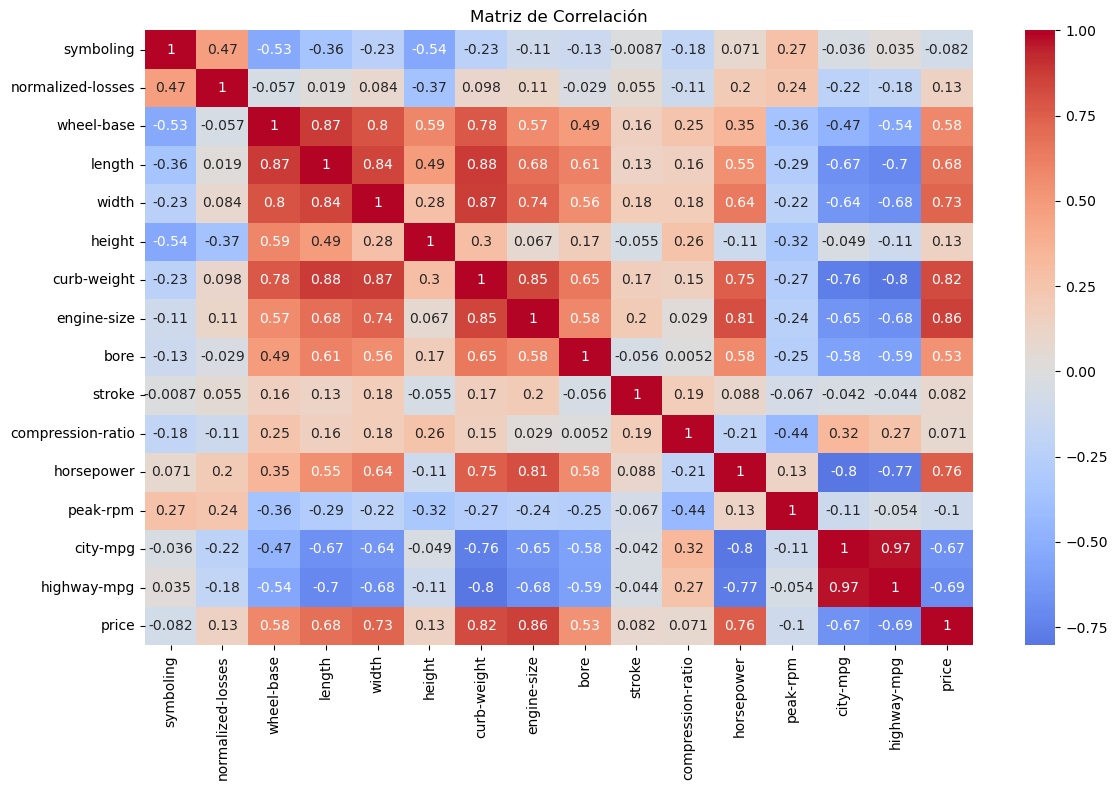

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

df = pd.read_csv('../../../data/Automobile_data.csv')

df.head()

#Tratamiento de valores nulos o de distinto tipo
df = df.replace('?', np.nan)

# Convertir columnas numéricas
numeric_columns = ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Imputar valores nulos
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        df[col].fillna(df[col].mean(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

columnas_numericas = df.select_dtypes(include=['float64', 'int64']).columns

print("\n=== DETECCIÓN DE OUTLIERS ===")
outliers_info = {}

for columna in columnas_numericas:
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)][columna]
    outliers_info[columna] = len(outliers)
    
    print(f"\nOutliers en {columna}: {len(outliers)}")

print("\n=== ANÁLISIS DE CORRELACIÓN ===")
correlation_matrix = df[columnas_numericas].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()



2. Preparacion de datos

In [18]:
#Preprocesamiento
print("\n=== PREPROCESAMIENTO DE DATOS ===")

# Seleccionar características relevantes
features_numericas = ['wheel-base', 'length', 'width', 'height', 'curb-weight', 
                        'engine-size', 'bore', 'stroke', 'compression-ratio', 
                        'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']

features_categoricas = ['fuel-type', 'aspiration', 'num-of-doors', 'body-style',
                        'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders']

# Transformar variables categóricas
le = LabelEncoder()
df_procesado = df.copy()

for columna in features_categoricas:
    df_procesado[columna] = le.fit_transform(df_procesado[columna])

# Combinar features
X = df_procesado[features_numericas + features_categoricas]
y = df_procesado['price']

# División del conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalado de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nDimensiones del conjunto de entrenamiento:", X_train_scaled.shape)
print("Dimensiones del conjunto de prueba:", X_test_scaled.shape)



=== PREPROCESAMIENTO DE DATOS ===

Dimensiones del conjunto de entrenamiento: (164, 21)
Dimensiones del conjunto de prueba: (41, 21)


3. Modelos de regresion

In [19]:
print("\n=== ENTRENAMIENTO Y EVALUACIÓN DE MODELOS ===")

# Definir modelos
modelos = {
    'Regresión Lineal': LinearRegression(),
    'KNN': KNeighborsRegressor(),
    'Árbol de Decisión': DecisionTreeRegressor()
}

# Entrenar y evaluar modelos
resultados = []
for nombre, modelo in modelos.items():
    print(f"\nEvaluación del modelo: {nombre}")
    
    # Entrenamiento
    modelo.fit(X_train_scaled, y_train)
    
    # Predicciones
    y_pred = modelo.predict(X_test_scaled)
    
    # Evaluación
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
    print(f"Coeficiente de Determinación (R²): {r2:.4f}")
    
    resultados.append({'modelo': nombre, 'mse': mse, 'r2': r2})


=== ENTRENAMIENTO Y EVALUACIÓN DE MODELOS ===

Evaluación del modelo: Regresión Lineal
Error Cuadrático Medio (MSE): 17085149.58
Coeficiente de Determinación (R²): 0.7809

Evaluación del modelo: KNN
Error Cuadrático Medio (MSE): 21076644.97
Coeficiente de Determinación (R²): 0.7297

Evaluación del modelo: Árbol de Decisión
Error Cuadrático Medio (MSE): 6287671.41
Coeficiente de Determinación (R²): 0.9194


c:\Users\Ivan\miniconda3\envs\env_ds\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Ivan\miniconda3\envs\env_ds\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\Ivan\miniconda3\envs\env_ds\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Ivan\miniconda3\envs\env_ds\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\Ivan\miniconda3\envs\env_ds\Lib\subprocess.py", line 1538

4. Optimizacion y validacion 

In [20]:
print("\n=== OPTIMIZACIÓN DE MODELOS ===")

# Optimización KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_knn = GridSearchCV(KNeighborsRegressor(), param_grid_knn, cv=5)
grid_knn.fit(X_train_scaled, y_train)

print("\nMejores parámetros para KNN:")
print(grid_knn.best_params_)

# Optimización Árbol de Decisión
param_grid_dt = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_dt = GridSearchCV(DecisionTreeRegressor(), param_grid_dt, cv=5)
grid_dt.fit(X_train_scaled, y_train)

print("\nMejores parámetros para Árbol de Decisión:")
print(grid_dt.best_params_)

# 5. VALIDACIÓN CRUZADA
print("\n=== VALIDACIÓN CRUZADA ===")

modelos_optimizados = {
    'KNN Optimizado': grid_knn.best_estimator_,
    'Árbol de Decisión Optimizado': grid_dt.best_estimator_
}

for nombre, modelo in modelos_optimizados.items():
    scores = cross_val_score(modelo, X_train_scaled, y_train, cv=5, scoring='r2')
    print(f"\n{nombre}:")
    print(f"R² promedio: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")


=== OPTIMIZACIÓN DE MODELOS ===

Mejores parámetros para KNN:
{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}

Mejores parámetros para Árbol de Decisión:
{'max_depth': 9, 'min_samples_leaf': 4, 'min_samples_split': 2}

=== VALIDACIÓN CRUZADA ===

KNN Optimizado:
R² promedio: 0.8225 (+/- 0.2185)

Árbol de Decisión Optimizado:
R² promedio: 0.7687 (+/- 0.2204)



=== COMPARACIÓN FINAL DE MODELOS ===

Resumen de rendimiento:
              modelo           mse        r2
0   Regresión Lineal  1.708515e+07  0.780881
1                KNN  2.107664e+07  0.729690
2  Árbol de Decisión  6.287671e+06  0.919360


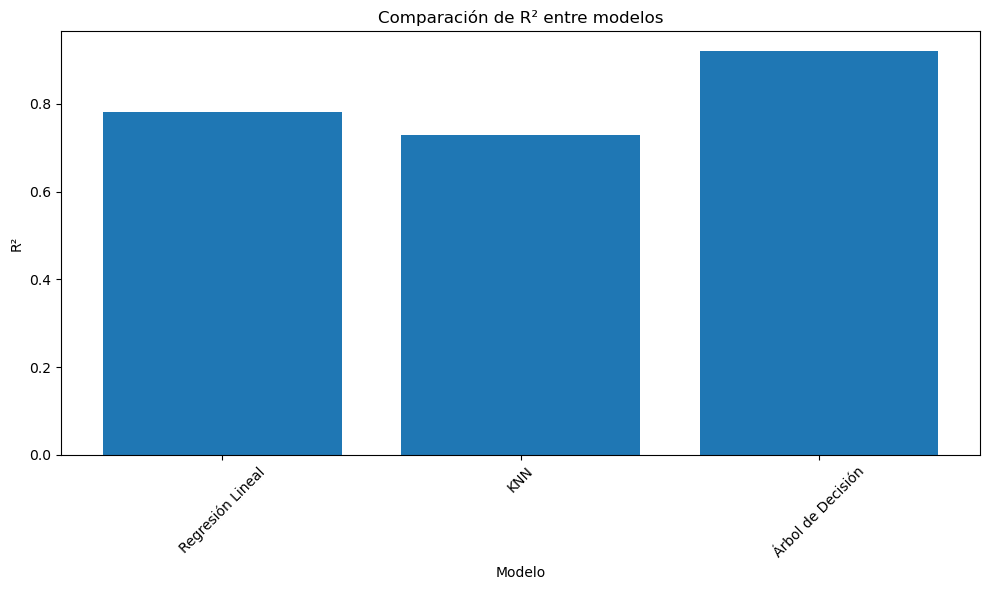

In [21]:
print("\n=== COMPARACIÓN FINAL DE MODELOS ===")
resultados_df = pd.DataFrame(resultados)
print("\nResumen de rendimiento:")
print(resultados_df)

# Visualización de comparación de modelos
plt.figure(figsize=(10, 6))
plt.bar(resultados_df['modelo'], resultados_df['r2'])
plt.title('Comparación de R² entre modelos')
plt.xlabel('Modelo')
plt.ylabel('R²')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()